# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [67]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
# from keras import datasets
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import random

In [68]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [69]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [70]:
x_train.shape

(60000, 28, 28, 1)

#### One-hot-encode your labels here

In [71]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(y)

  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [72]:
#code here
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu',padding="same", kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same",kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu',padding="same", kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu',padding="same", kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))



In [73]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
My_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="min",
    baseline=None,
    restore_best_weights=False,
)


In [75]:
model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test),callbacks=[My_callback])

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.1305 - accuracy: 0.9591 - val_loss: 0.0514 - val_accuracy: 0.9827
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0386 - val_accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0318 - val_accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.0357 - val_accuracy: 0.9895


In [76]:
epo = len(model_history.history["accuracy"])

In [77]:
score_test = model.evaluate(x_test, y_test, verbose=1)
score_train = model.evaluate(x_train, y_train, verbose=1)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0076 - accuracy: 0.9976


In [78]:
print("Test Loss = ",score_test[0])
print("Test Accuracy = ",score_test[1])
print("Train Loss = ",score_train[0])
print("Train Accuracy = ",score_train[1])

Test Loss =  0.035722315311431885
Test Accuracy =  0.9894999861717224
Train Loss =  0.00759171973913908
Train Accuracy =  0.9975666403770447


In [79]:
trainableParams = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
print("Trainable Parameters in the Model are :", trainableParams)

# model.summary()

Trainable Parameters in the Model are : 5130134


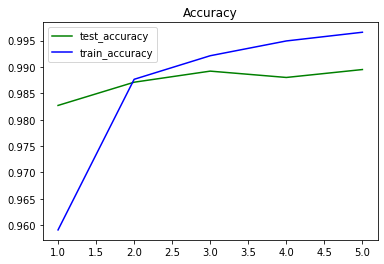

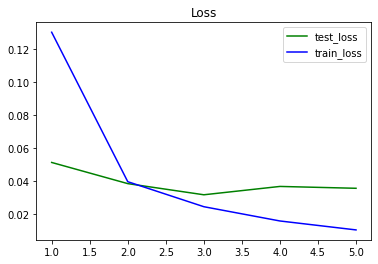

In [80]:
# for i in range(len(score_test)):
# 		# plot loss
# 		plt.subplot(2, 1, 1)
# 		plt.title('Cross Entropy Loss')
# 		plt.plot(score_test[i].history['loss'], color='blue', label='train')
# 		plt.plot(score_test[i].history['val_loss'], color='orange', label='test')
# 		# plot accuracy
# 		plt.subplot(2, 1, 2)
# 		plt.title('Classification Accuracy')
# 		plt.plot(score_test[i].history['accuracy'], color='blue', label='train')
# 		plt.plot(score_test[i].history['val_accuracy'], color='orange', label='test')
# plt.show()

# model_history.history['loss']



plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()


# plt.title('Accuracy')
# plt.plot(range(1,16),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
# plt.plot(range(1,16),model_history.history['accuracy'], color='blue', label='train_accuracy')
# plt.legend()
# plt.show()

# plt.title('Loss')
# plt.plot(range(1,16),model_history.history['val_loss'], color='Green', label='test_loss')
# plt.plot(range(1,16),model_history.history['loss'], color='blue', label='train_loss')
# plt.legend()


# plt.show()


## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [81]:
start_train = y_train[0:12000]
random.shuffle(start_train)
y_train[0:12000]=start_train

In [82]:
y_train.shape

(60000, 10)

label shape:  (60000, 10) (10000, 10)
Epoch 1/15
938/938 [==============================] - 27s 28ms/step - loss: 0.9693 - accuracy: 0.8119 - val_loss: 0.1771 - val_accuracy: 0.9897
Epoch 2/15
938/938 [==============================] - 26s 27ms/step - loss: 0.8939 - accuracy: 0.8155 - val_loss: 0.3099 - val_accuracy: 0.9876
Epoch 3/15
938/938 [==============================] - 26s 27ms/step - loss: 0.8472 - accuracy: 0.8164 - val_loss: 0.3037 - val_accuracy: 0.9870
Epoch 4/15
938/938 [==============================] - 27s 28ms/step - loss: 0.7885 - accuracy: 0.8178 - val_loss: 0.3014 - val_accuracy: 0.9814
Epoch 5/15
938/938 [==============================] - 26s 28ms/step - loss: 0.7086 - accuracy: 0.8221 - val_loss: 0.2738 - val_accuracy: 0.9660
Epoch 6/15
938/938 [==============================] - 25s 27ms/step - loss: 0.5896 - accuracy: 0.8401 - val_loss: 0.3135 - val_accuracy: 0.9522
Epoch 7/15
938/938 [==============================] - 26s 28ms/step - loss: 0.4441 - accuracy: 0.8

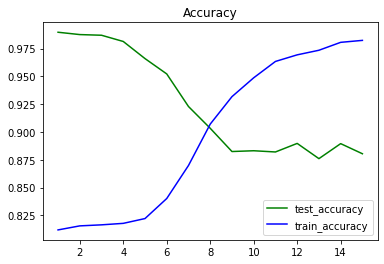

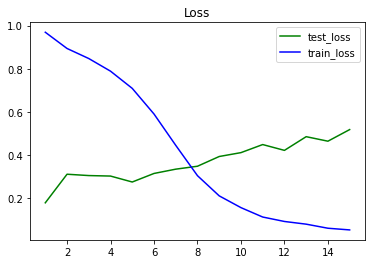

In [83]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))

model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))
epo = len(model_history.history["accuracy"])

score_test = model.evaluate(x_test, y_test, verbose=1)
score_train = model.evaluate(x_train, y_train, verbose=1)

print("Test Loss = ",score_test[0])
print("Test Accuracy = ",score_test[1])
print("Train Loss = ",score_train[0])
print("Train Accuracy = ",score_train[1])


plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()


Epoch 1/15
938/938 [==============================] - 27s 28ms/step - loss: 1.5554 - accuracy: 0.6202 - val_loss: 0.5453 - val_accuracy: 0.9767
Epoch 2/15
938/938 [==============================] - 25s 27ms/step - loss: 1.3769 - accuracy: 0.6384 - val_loss: 0.5904 - val_accuracy: 0.9706
Epoch 3/15
938/938 [==============================] - 27s 28ms/step - loss: 1.2215 - accuracy: 0.6525 - val_loss: 0.6183 - val_accuracy: 0.9340
Epoch 4/15
938/938 [==============================] - 25s 27ms/step - loss: 0.9682 - accuracy: 0.7037 - val_loss: 0.6201 - val_accuracy: 0.8691
Epoch 5/15
938/938 [==============================] - 26s 28ms/step - loss: 0.6035 - accuracy: 0.8093 - val_loss: 0.7937 - val_accuracy: 0.7532
Epoch 6/15
938/938 [==============================] - 25s 27ms/step - loss: 0.2996 - accuracy: 0.9020 - val_loss: 0.9069 - val_accuracy: 0.7344
Epoch 7/15
938/938 [==============================] - 27s 28ms/step - loss: 0.1821 - accuracy: 0.9394 - val_loss: 1.0834 - val_accuracy:

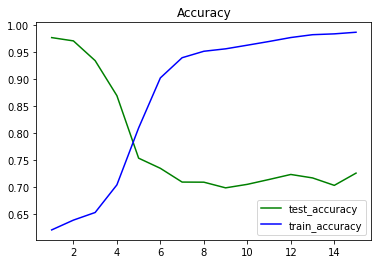

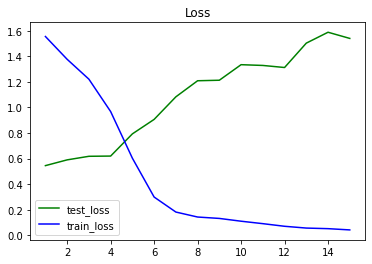

In [84]:
start_train = y_train[0:24000]
random.shuffle(start_train)
y_train[0:24000]=start_train

model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))
epo = len(model_history.history["accuracy"])

plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()

Epoch 1/15
938/938 [==============================] - 25s 27ms/step - loss: 2.0407 - accuracy: 0.4124 - val_loss: 0.9561 - val_accuracy: 0.9467
Epoch 2/15
938/938 [==============================] - 25s 27ms/step - loss: 1.8839 - accuracy: 0.4467 - val_loss: 0.9645 - val_accuracy: 0.9438
Epoch 3/15
938/938 [==============================] - 25s 27ms/step - loss: 1.7919 - accuracy: 0.4568 - val_loss: 0.9958 - val_accuracy: 0.9268
Epoch 4/15
938/938 [==============================] - 25s 27ms/step - loss: 1.6428 - accuracy: 0.4808 - val_loss: 1.0344 - val_accuracy: 0.8361
Epoch 5/15
938/938 [==============================] - 25s 27ms/step - loss: 1.3891 - accuracy: 0.5487 - val_loss: 1.0837 - val_accuracy: 0.7176
Epoch 6/15
938/938 [==============================] - 27s 28ms/step - loss: 1.0185 - accuracy: 0.6653 - val_loss: 1.2432 - val_accuracy: 0.6074
Epoch 7/15
938/938 [==============================] - 25s 27ms/step - loss: 0.6160 - accuracy: 0.7956 - val_loss: 1.5870 - val_accuracy:

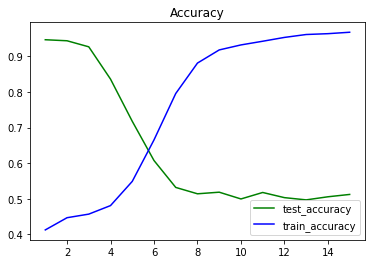

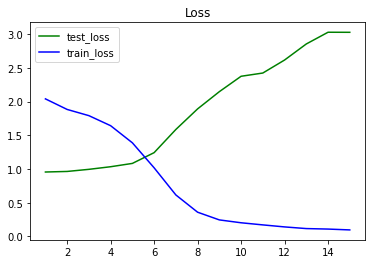

In [85]:
start_train = y_train[0:36000]
random.shuffle(start_train)
y_train[0:36000]=start_train

model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))
epo = len(model_history.history["accuracy"])

plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()

Epoch 1/15
938/938 [==============================] - 26s 28ms/step - loss: 2.3521 - accuracy: 0.1380 - val_loss: 2.1006 - val_accuracy: 0.3267
Epoch 2/15
938/938 [==============================] - 25s 27ms/step - loss: 2.2660 - accuracy: 0.1739 - val_loss: 1.9111 - val_accuracy: 0.5288
Epoch 3/15
938/938 [==============================] - 25s 26ms/step - loss: 2.2321 - accuracy: 0.2203 - val_loss: 1.7444 - val_accuracy: 0.6530
Epoch 4/15
938/938 [==============================] - 26s 28ms/step - loss: 2.2112 - accuracy: 0.2377 - val_loss: 1.6754 - val_accuracy: 0.7641
Epoch 5/15
938/938 [==============================] - 26s 28ms/step - loss: 2.1927 - accuracy: 0.2474 - val_loss: 1.5774 - val_accuracy: 0.7856
Epoch 6/15
938/938 [==============================] - 26s 28ms/step - loss: 2.1754 - accuracy: 0.2537 - val_loss: 1.6083 - val_accuracy: 0.7468
Epoch 7/15
938/938 [==============================] - 25s 26ms/step - loss: 2.1544 - accuracy: 0.2594 - val_loss: 1.5371 - val_accuracy:

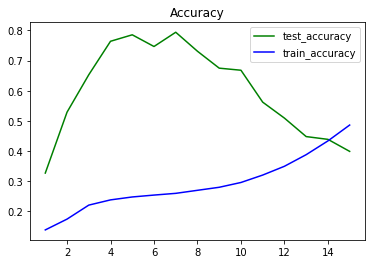

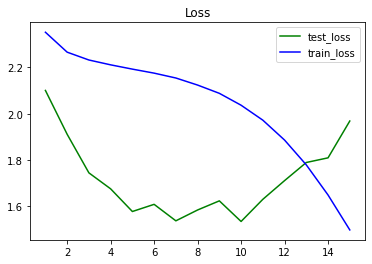

In [86]:
start_train = y_train[0:48000]
random.shuffle(start_train)
y_train[0:48000]=start_train

model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))
epo = len(model_history.history["accuracy"])

plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()

Epoch 1/15
938/938 [==============================] - 25s 27ms/step - loss: 2.3025 - accuracy: 0.1302 - val_loss: 2.3194 - val_accuracy: 0.1136
Epoch 2/15
938/938 [==============================] - 25s 26ms/step - loss: 2.2887 - accuracy: 0.1336 - val_loss: 2.3121 - val_accuracy: 0.0984
Epoch 3/15
938/938 [==============================] - 26s 28ms/step - loss: 2.2872 - accuracy: 0.1346 - val_loss: 2.3156 - val_accuracy: 0.1158
Epoch 4/15
938/938 [==============================] - 25s 26ms/step - loss: 2.2839 - accuracy: 0.1369 - val_loss: 2.3159 - val_accuracy: 0.1148
Epoch 5/15
938/938 [==============================] - 25s 26ms/step - loss: 2.2789 - accuracy: 0.1385 - val_loss: 2.3145 - val_accuracy: 0.1172
Epoch 6/15
938/938 [==============================] - 26s 28ms/step - loss: 2.2711 - accuracy: 0.1440 - val_loss: 2.3170 - val_accuracy: 0.1218
Epoch 7/15
938/938 [==============================] - 25s 27ms/step - loss: 2.2587 - accuracy: 0.1507 - val_loss: 2.3258 - val_accuracy:

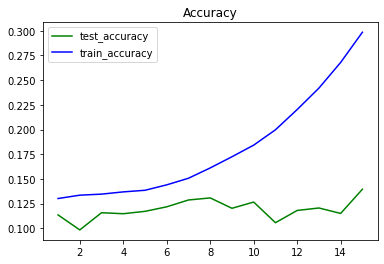

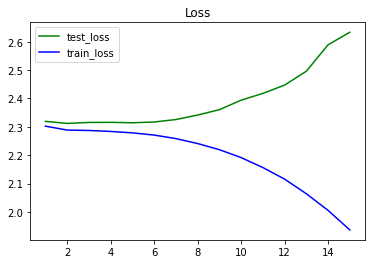

In [87]:
random.shuffle(y_train)


model_history = model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))
epo = len(model_history.history["accuracy"])

plt.title('Accuracy')
plt.plot(range(1,epo+1),model_history.history['val_accuracy'], color='Green', label='test_accuracy')
plt.plot(range(1,epo+1),model_history.history['accuracy'], color='blue', label='train_accuracy')
plt.legend()
plt.show()

plt.title('Loss')
plt.plot(range(1,epo+1),model_history.history['val_loss'], color='Green', label='test_loss')
plt.plot(range(1,epo+1),model_history.history['loss'], color='blue', label='train_loss')
plt.legend()
plt.show()